# Q1

In [14]:
using JuMP, Ipopt

m = Model(solver = IpoptSolver())
#Polar coordinate theta
@variable(m, theta[1:6] >= 0)

#Polar coordiante radius 
@variable(m, r[1:6] >= 0)

#Areas of subtriangles
@variable(m, area[1:6] >= 0)

#Angles are increasing
for i in 2:6
    @constraint(m, theta[i] >= theta[i-1])
end

#distances between points less than 1
@constraint(m, theta[6] == 2pi)
for i in 1:5
    for j in (i+1):6
        @NLconstraint(m, 
            (r[i]cos(theta[i]) - r[j]cos(theta[j]))^2 + 
            (r[i]sin(theta[i]) - r[j]sin(theta[j]))^2 <= 1)
        end
    end
@NLconstraint(m, area[1] == sin(theta[1])r[1]r[6]/2)
for i in 2:6
        @NLconstraint(m,area[i] == sin(theta[i] - theta[i-1])r[i]r[i-1]/2)
end
@objective(m, Max, sum(area))

solve(m)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.12.1, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:       30
Number of nonzeros in inequality constraint Jacobian.:       70
Number of nonzeros in Lagrangian Hessian.............:      206

Total number of variables............................:       18
                     variables with only lower bounds:       18
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equa

:Optimal

In [16]:
area_val = getvalue(area)
print("Optimal total area: ", sum(area_val))

Optimal total area: 0.6749814346444984

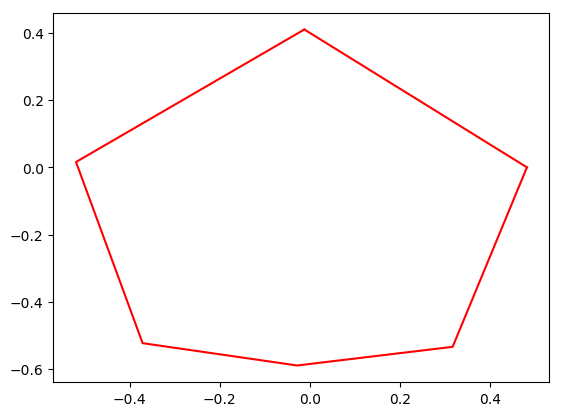

Max distance squared, 0.9999999954210722

In [33]:
using PyPlot
theta_val = getvalue(theta)
r_val = getvalue(r)
x = cos(theta_val).*r_val
y = sin(theta_val).*r_val
plot(x,y,"r")
plot([x[6],x[1]],[y[6],y[1]], "r" )

max_val =0
for i in 1:5
    for j in i+1:6
        dist = (x[i] - x[j])^2 + (y[i] - y[j])^2
        max_val = max(max_val, dist)
    end
end
print("Max distance squared, ",max_val)

# Q2

In [57]:
x = [-5; -3; -1; 1; 3; 5]
y = [127; 151; 379; 421; 460; 426]

6-element Array{Int64,1}:
 127
 151
 379
 421
 460
 426

In [58]:
m = Model(solver =IpoptSolver())
#coefficients
@variable(m, k[1:3])
#prediction values of regression
@variable(m, pred[1:6])

#set regression values
for i in 1:6
    @NLconstraint(m, pred[i] == k[1] + k[2]exp(x[i]k[3]))
end
@NLobjective(m,Min, sum((pred[i] - y[i])^2 for i = 1:6))
solve(m)    

This is Ipopt version 3.12.1, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:       24
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:       24

Total number of variables............................:        9
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        6
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

:Optimal

In [59]:
k_vals = getvalue(k)
for i in 1:3
    println("k",i," = ",k_vals[i])
end

k1 = 523.3055386212442
k2 = -156.94784350151681
k3 = -0.19966456906074553


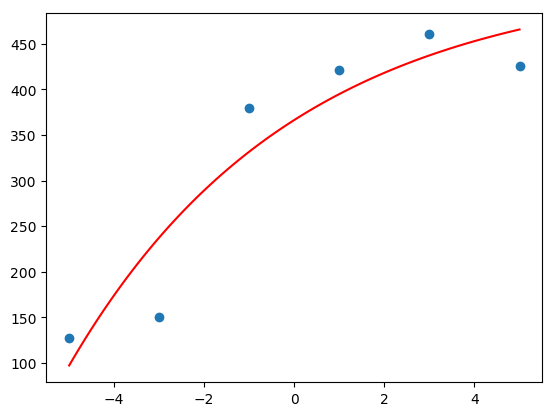

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fdab640c910>

In [65]:
scatter(x,y)
x_pred = linspace(-5,5,100)
y_pred = k_vals[1] + k_vals[2].*exp(k_vals[3].*x_pred)
plot(x_pred, y_pred,"r")